In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('train_data.csv', index_col='Customer Id')

In [3]:
# Show the first 15 rows of the data
df.head(n=15)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
Customer Id,,,,,,,,,,,,,
H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
H4977,2012,1.000000,0,V,N,O,R,535.0,1,1980.0,3,1143,0
H7390,2012,1.000000,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
H19355,2014,1.000000,0,V,N,O,R,2735.0,1,2013.0,3,1173,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, H14663 to H7470
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   6652 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Geo_Code            7058 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 783.1+ KB


In [4]:
df.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [5]:
df['Garden'].isnull().value_counts()/len(df)

False    0.999022
True     0.000978
Name: Garden, dtype: float64

In [6]:
df['Building Dimension'].isnull().value_counts()/len(df)

False    0.985196
True     0.014804
Name: Building Dimension, dtype: float64

In [7]:
df['Date_of_Occupancy'].isnull().value_counts()/len(df)

False    0.92905
True     0.07095
Name: Date_of_Occupancy, dtype: float64

In [8]:
df['Geo_Code'].isnull().value_counts()/len(df)

False    0.985754
True     0.014246
Name: Geo_Code, dtype: float64

In [9]:
df.drop(columns='NumberOfWindows', inplace=True)

In [10]:
df.head(15)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
Customer Id,,,,,,,,,,,,
H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,1053,0
H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,1053,0
H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,1053,0
H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,1053,0
H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,1053,0
H4977,2012,1.000000,0,V,N,O,R,535.0,1,1980.0,1143,0
H7390,2012,1.000000,0,N,V,V,U,2830.0,1,1988.0,1143,0
H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,1160,0
H19355,2014,1.000000,0,V,N,O,R,2735.0,1,2013.0,1173,1


In [11]:
df.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
Geo_Code              102
Claim                   0
dtype: int64

In [12]:
df.columns= ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy', 'Geo_Code',
       'Claim']

In [13]:
df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)

In [14]:
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median(), inplace=True)

In [15]:
df['Building_Dimension'].fillna(df['Building_Dimension'].median(), inplace=True)

In [16]:
df['Geo_Code'].fillna(df['Geo_Code'].mode()[0], inplace=True)

In [17]:
df.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy', 'Geo_Code',
       'Claim'],
      dtype='object')

In [18]:
df.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy', 'Geo_Code',
       'Claim'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7160 entries, H14663 to H7470
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7160 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building_Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  Geo_Code            7160 non-null   object 
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 727.2+ KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df['Claim'].value_counts()/len(df)

0    0.771788
1    0.228212
Name: Claim, dtype: float64

In [22]:
train1, test1 = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
train1['Claim'].value_counts()/len(train1)

0    0.773045
1    0.226955
Name: Claim, dtype: float64

In [24]:
test1['Claim'].value_counts()/len(test1)

0    0.76676
1    0.23324
Name: Claim, dtype: float64

In [25]:
train2, test2 = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Claim'], shuffle=True)

In [26]:
train2['Claim'].value_counts()/len(train2)

0    0.771823
1    0.228177
Name: Claim, dtype: float64

In [27]:
test2['Claim'].value_counts()/len(test2)

0    0.771648
1    0.228352
Name: Claim, dtype: float64

In [28]:
import math

In [29]:
train_copy=train2.copy()

In [30]:
train_copy['Geo_Code'].unique()

array(['10387', '83137', '33555', ..., '91421', '21295', '40328'],
      dtype=object)

In [31]:
train_copy['Insured_Period'].unique()

array([0.83606557, 1.        , 0.99726776, 0.49589041, 0.16438356,
       0.50273224, 0.24657534, 0.94535519, 0.87123288, 0.68219178,
       0.53424657, 0.12295082, 0.08196721, 0.67759563, 0.61202186,
       0.41369863, 0.        , 0.46448087, 0.16164384, 0.52054795,
       0.58082192, 0.84657534, 0.83287671, 0.7479452 , 0.03561644,
       0.22191781, 0.96721311, 0.27123288, 0.99453552, 0.58196721,
       0.3479452 , 0.10410959, 0.24863388, 0.66575343, 0.91530055,
       0.49726776, 0.98356164, 0.78356164, 0.80273973, 0.79781421,
       0.6420765 , 0.22739726, 0.74863388, 0.59452055, 0.78082192,
       0.50410959, 0.41530055, 0.75342466, 0.06010929, 0.08469945,
       0.03005465, 0.81643836, 0.25205479, 0.99726027, 0.84699454,
       0.95616438, 0.66393443, 0.68852459, 0.91506849, 0.33060109,
       0.8109589 , 0.49453552, 0.69589041, 0.6       , 0.46849315,
       0.73424658, 0.82465753, 0.04383562, 0.37260274, 0.82191781,
       0.08493151, 0.67486339, 0.02191781, 0.4109589 , 0.32876

In [37]:
def cleaner(x):
    if 0 < x <= 0.5:
        return 0.5
    elif x > 0.5:
        return 1
    else:
        return 0


In [38]:
train_copy['Insured_Period']=train_copy['Insured_Period'].apply(cleaner)

 E.D.A

In [34]:
train_copy = train2.copy()

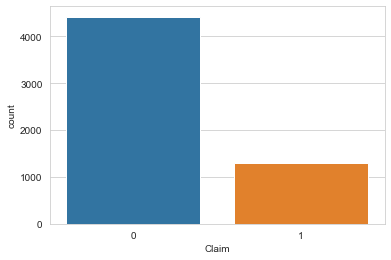

In [35]:
sns.countplot(x="Claim", data=train_copy)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


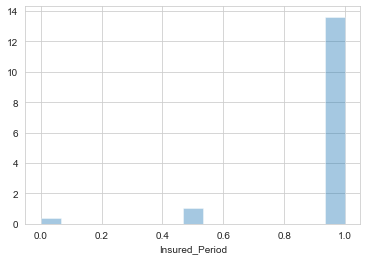

In [39]:
sns.distplot(train_copy['Insured_Period'], bins=15)

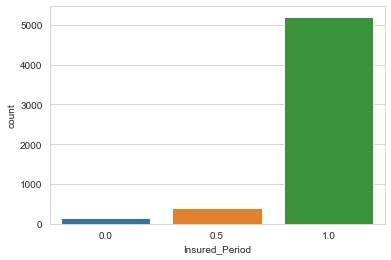

In [40]:
sns.countplot(x="Insured_Period", data=train_copy)

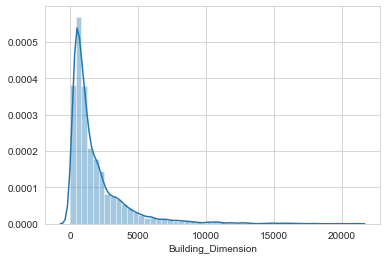

In [41]:
sns.distplot(train_copy['Building_Dimension'], bins=50)

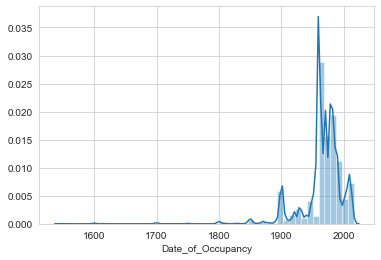

In [42]:
sns.distplot(train_copy['Date_of_Occupancy'], bins=50)

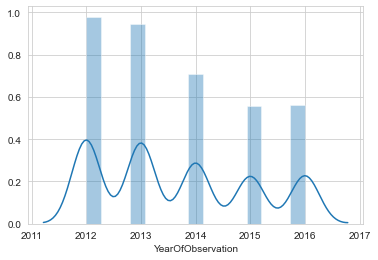

In [43]:
sns.distplot(train_copy['YearOfObservation'], bins=15)

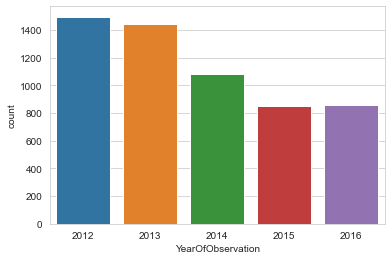

In [44]:
sns.countplot(x="YearOfObservation", data=train_copy)

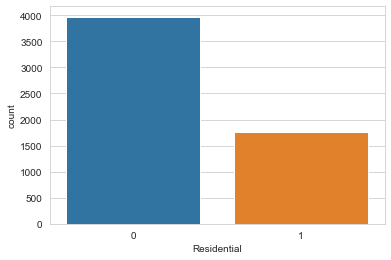

In [45]:
sns.countplot(x="Residential", data=train_copy)

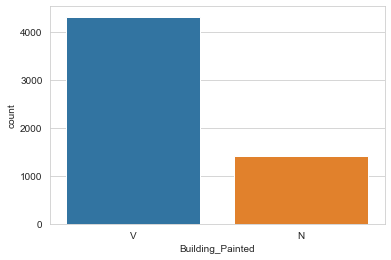

In [46]:
sns.countplot(x="Building_Painted", data=train_copy)


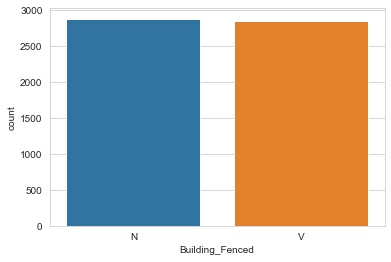

In [47]:
sns.countplot(x="Building_Fenced", data=train_copy)

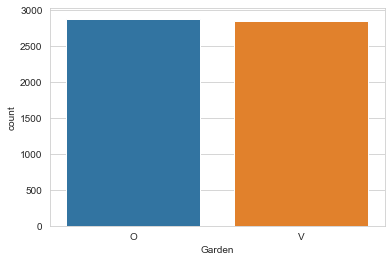

In [48]:
sns.countplot(x="Garden", data=train_copy)


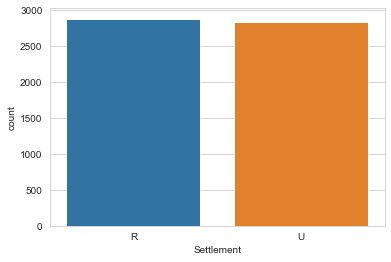

In [49]:
sns.countplot(x="Settlement", data=train_copy)

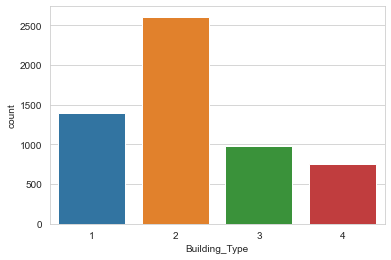

In [50]:
sns.countplot(x="Building_Type", data=train_copy)

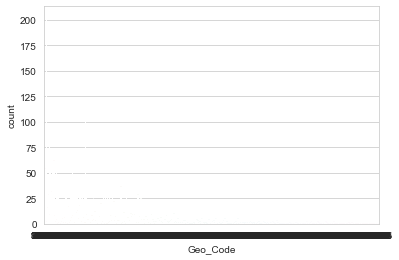

In [51]:
sns.countplot(x="Geo_Code", data=train_copy)

In [52]:
train_copy.groupby('Residential')['Claim'].value_counts()

Residential  Claim
0            0        3134
             1         839
1            0        1287
             1         468
Name: Claim, dtype: int64

In [53]:
train_copy.groupby('Building_Painted')['Claim'].value_counts()

Building_Painted  Claim
N                 0        1112
                  1         294
V                 0        3309
                  1        1013
Name: Claim, dtype: int64

In [54]:
train_copy.groupby('Building_Fenced')['Claim'].value_counts()

Building_Fenced  Claim
N                0        2170
                 1         712
V                0        2251
                 1         595
Name: Claim, dtype: int64

In [55]:
train_copy.groupby('Garden')['Claim'].value_counts()

Garden  Claim
O       0        2170
        1         713
V       0        2251
        1         594
Name: Claim, dtype: int64

In [56]:
train_copy.groupby('Building_Type')['Claim'].value_counts()

Building_Type  Claim
1              0        1144
               1         247
2              0        2049
               1         558
3              0         728
               1         252
4              0         500
               1         250
Name: Claim, dtype: int64

In [57]:
train_copy.groupby('Settlement')['Claim'].value_counts()

Settlement  Claim
R           0        2171
            1         713
U           0        2250
            1         594
Name: Claim, dtype: int64

In [58]:
train_copy.groupby('Insured_Period')['Claim'].value_counts()

Insured_Period  Claim
0.0             0         117
                1          23
0.5             0         344
                1          43
1.0             0        3960
                1        1241
Name: Claim, dtype: int64

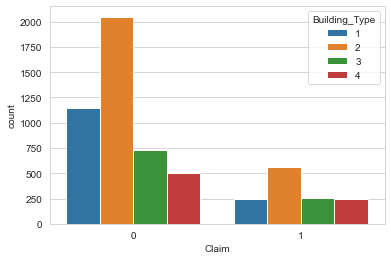

In [59]:
sns.countplot(x='Claim', data= train_copy, hue='Building_Type')

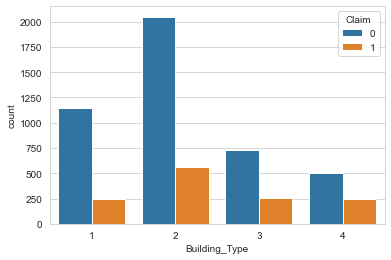

In [60]:
sns.countplot(x='Building_Type', data= train_copy, hue='Claim')

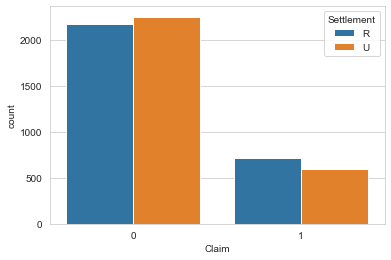

In [61]:
sns.countplot(x='Claim', data= train_copy, hue='Settlement')

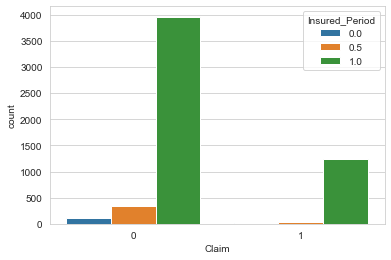

In [62]:
sns.countplot(x='Claim', data= train_copy, hue='Insured_Period')

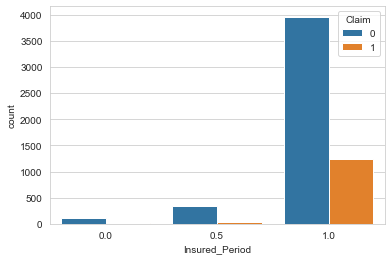

In [63]:
sns.countplot(x='Insured_Period', data= train_copy, hue='Claim')

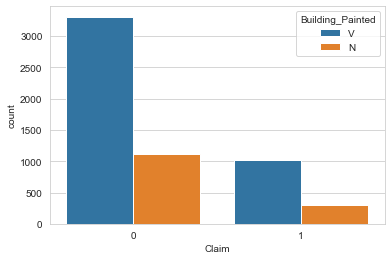

In [64]:
sns.countplot(x='Claim', data= train_copy, hue='Building_Painted')

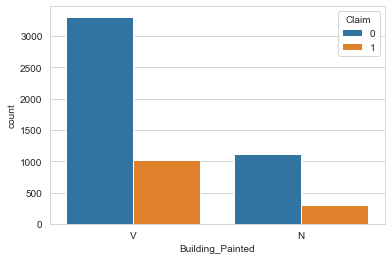

In [65]:
sns.countplot(x='Building_Painted', data= train_copy, hue='Claim')

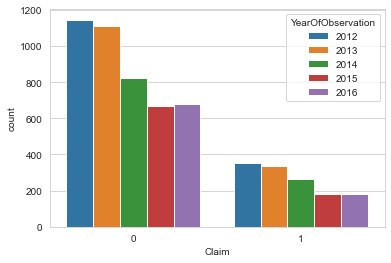

In [66]:
sns.countplot(x='Claim', data= train_copy, hue='YearOfObservation')

In [67]:
train_copy.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building_Dimension    0
Building_Type         0
Date_of_Occupancy     0
Geo_Code              0
Claim                 0
dtype: int64

In [68]:
painted = pd.get_dummies(data = train_copy['Building_Painted'], prefix = 'painted')
fenced = pd.get_dummies(data = train_copy['Building_Fenced'], prefix = 'fenced')
garden = pd.get_dummies(data = train_copy['Garden'], prefix = 'Garden')
settlement = pd.get_dummies(data = train_copy['Settlement'], prefix = 'settlement')
Type = pd.get_dummies(data = train_copy['Building_Type'], prefix = 'type')

In [69]:
#train_copy['Insured_Period'] = train_copy['Insured_Period'].apply(math.ceil)
train_copy['Building_Dimension'] = train_copy['Building_Dimension'].apply(math.ceil)
train_copy['Date_of_Occupancy'] = train_copy['Date_of_Occupancy'].apply(math.ceil)

In [70]:
train_copy.head(20)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
Customer Id,,,,,,,,,,,,
H19077,2012,1.0,0,V,N,O,R,1441,1,1961,10387,0
H19437,2015,1.0,0,V,N,O,R,3500,2,2011,83137,1
H17301,2014,1.0,1,V,N,O,R,716,1,2011,33555,0
H1734,2016,1.0,1,V,V,V,U,700,3,1970,93005,0
H14556,2014,1.0,1,N,V,V,U,3480,4,1970,75114,1
H5533,2014,1.0,1,V,N,O,R,5927,4,1972,6088,1
H3966,2013,0.5,0,V,V,V,U,400,1,1960,61169,0
H6785,2013,1.0,1,N,V,V,U,2184,4,1960,75109,1
H12865,2015,1.0,1,N,V,V,U,520,1,1980,74083,0


In [71]:
train_copy = pd.concat([train_copy, painted,fenced,garden,settlement,Type], axis =1)

In [72]:
train_copy.head(15)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,...,fenced_N,fenced_V,Garden_O,Garden_V,settlement_R,settlement_U,type_1,type_2,type_3,type_4
Customer Id,,,,,,,,,,,,,,,,,,,,,
H19077,2012,1.0,0,V,N,O,R,1441,1,1961,...,1,0,1,0,1,0,1,0,0,0
H19437,2015,1.0,0,V,N,O,R,3500,2,2011,...,1,0,1,0,1,0,0,1,0,0
H17301,2014,1.0,1,V,N,O,R,716,1,2011,...,1,0,1,0,1,0,1,0,0,0
H1734,2016,1.0,1,V,V,V,U,700,3,1970,...,0,1,0,1,0,1,0,0,1,0
H14556,2014,1.0,1,N,V,V,U,3480,4,1970,...,0,1,0,1,0,1,0,0,0,1
H5533,2014,1.0,1,V,N,O,R,5927,4,1972,...,1,0,1,0,1,0,0,0,0,1
H3966,2013,0.5,0,V,V,V,U,400,1,1960,...,0,1,0,1,0,1,1,0,0,0
H6785,2013,1.0,1,N,V,V,U,2184,4,1960,...,0,1,0,1,0,1,0,0,0,1
H12865,2015,1.0,1,N,V,V,U,520,1,1980,...,0,1,0,1,0,1,1,0,0,0


In [75]:
drop_col = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type','Geo_Code']

In [76]:
train_copy.drop(columns= drop_col, inplace=True)

In [77]:
train_copy

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Date_of_Occupancy,Claim,painted_N,painted_V,fenced_N,fenced_V,Garden_O,Garden_V,settlement_R,settlement_U,type_1,type_2,type_3,type_4
Customer Id,,,,,,,,,,,,,,,,,,
H19077,2012,1.0,0,1441,1961,0,0,1,1,0,1,0,1,0,1,0,0,0
H19437,2015,1.0,0,3500,2011,1,0,1,1,0,1,0,1,0,0,1,0,0
H17301,2014,1.0,1,716,2011,0,0,1,1,0,1,0,1,0,1,0,0,0
H1734,2016,1.0,1,700,1970,0,0,1,0,1,0,1,0,1,0,0,1,0
H14556,2014,1.0,1,3480,1970,1,1,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H16503,2012,1.0,1,900,1910,1,0,1,1,0,1,0,1,0,0,0,0,1
H16714,2016,1.0,1,3936,2008,0,0,1,1,0,1,0,1,0,0,1,0,0
H4842,2012,1.0,0,4200,1967,0,0,1,1,0,1,0,1,0,0,1,0,0


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier

In [80]:
x = train_copy.drop(columns = 'Claim')
y = train_copy['Claim']

In [81]:
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [82]:
accuracy = cross_val_score(estimator=rf,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()

0.7465044118185479

In [83]:
accuracy = cross_val_score(estimator=tree,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()

0.6897643368847557

In [84]:
accuracy = cross_val_score(estimator=knn,X=x,y=y, cv=10, scoring='accuracy')
accuracy.mean()

0.7484290142667106